# Exploring the dataset: Two-class weather classification

Importing useful libraries

In [1]:
import os #to communicate with the opertive system
import numpy as np #vector operations
from PIL import Image

#Libraries related with PyTorch
import torch #PyTorch library
from torch.utils.data import Dataset, random_split, DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as tt

#Useful libraries for plotting
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
%matplotlib inline  
#plots in the line below the code, inside the notebook 

## Introduction

I uploaded the dataset on Kaggle and created a new notebook from there.

The train dataset was a hard work made by other people and [this](https://www.cse.cuhk.edu.hk/leojia/projects/weatherclassify/index.htm) is the source. I had to make some pre-processing on it because in the original dataset the image's size are different from one another, this is the [notebook](http://www.kaggle.com/polavr/images-resize) where that code can be found. 

The train folder contains two folders, cloudy and sunny. These are the classes. Each folder contains 5000 RGB, jpg images of cloudy outdoors and 5000 images of sunny respectively. The size of the images is 200x200 pixels.

In [2]:
train_dir = '/kaggle/input/twoclass-weather-classification/train' 
classes = os.listdir(train_dir)
#num_classes = len(classes)
print(classes)

['cloudy', 'sunny']


The test dataset is mostly my own work, except for 13 images in the test_cloud folder (obtained from the webpage Creative commons. It also has two folders, one contains 100 cloudy images and the other contains 153 sunny images. The images are RGB an the format is .jpg. Each has a size of 200x200 pixels.

In [3]:
test_dir = '/kaggle/input/twoclass-weather-classification/test' 
classes = os.listdir(train_dir)
#num_classes = len(classes)
print(classes)

['cloudy', 'sunny']


Let's check how many images each folder has

In [4]:
#Train dataset

sunny_dir = '/kaggle/input/twoclass-weather-classification/train/sunny/'
sunny_files = os.listdir(sunny_dir)
print(len(sunny_files))

cloudy_dir = '/kaggle/input/twoclass-weather-classification/train/cloudy/'
cloudy_files = os.listdir(cloudy_dir)
print(len(cloudy_files))

5000
5000


In [5]:
#Test dataset

test_sunnydir = '/kaggle/input/twoclass-weather-classification/test/sunny/'
test_sunny_files = os.listdir(test_sunnydir)
print(len(test_sunny_files))

test_cloudydir = '/kaggle/input/twoclass-weather-classification/test/cloudy/'
test_cloudy_files = os.listdir(test_cloudydir)
print(len(test_cloudy_files))

153
100


The names of the images are coded like this:

For the training dataset: a '__c__' if it represents a cloudy outdoor or a '__s__' for a sunny outdoor + __4 digits__ representing the number of the image + __.jpg__ (the format). 

For the test dataset it's the same but it has 3 digits instead of 4.

In [6]:
print('Examples of the train sunny files: ' + str(sunny_files[:5]))
print('Examples of the train cloudy files: ' + str(cloudy_files[:5]))

Examples of the train sunny files: ['s2572.jpg', 's4039.jpg', 's1764.jpg', 's3589.jpg', 's0046.jpg']
Examples of the train cloudy files: ['c2258.jpg', 'c3164.jpg', 'c4152.jpg', 'c0630.jpg', 'c2125.jpg']


Let's plot a couple of images:

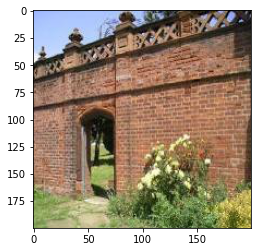

In [7]:
#Using PIL library and pyplot
plt.imshow(Image.open(sunny_dir+sunny_files[0]))

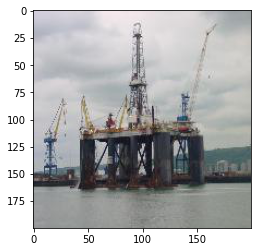

In [8]:
plt.imshow(Image.open(cloudy_dir+cloudy_files[2974]))

## Uploading the images into a dataset

In [9]:
from torchvision.datasets import ImageFolder
dataset = ImageFolder(train_dir, transform=tt.ToTensor())
test_dataset = ImageFolder(test_dir, transform=tt.ToTensor())

Let's see a couple of examples. The __dataset__[0:4999] are the cloudy images and are labeled with a 0.  

The __dataset__[5000:9999] are the sunny images and are labeled with a 1. 

I will define the function _show_example_ to plot some pictures with their corresponding label. 

In [10]:
#Using the matplotlib.pyplot (plt) library
def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

In [11]:
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 200, 200]) 0


tensor([[[0.7333, 0.7333, 0.7373,  ..., 0.7686, 0.7765, 0.7961],
         [0.7373, 0.7412, 0.7412,  ..., 0.7490, 0.7373, 0.7451],
         [0.7451, 0.7451, 0.7451,  ..., 0.7451, 0.7176, 0.7098],
         ...,
         [0.4157, 0.3961, 0.3922,  ..., 0.4706, 0.4824, 0.7490],
         [0.5686, 0.4784, 0.4863,  ..., 0.4784, 0.4510, 0.6745],
         [0.8157, 0.6902, 0.7137,  ..., 0.7333, 0.6706, 0.8627]],

        [[0.8039, 0.8039, 0.8078,  ..., 0.7922, 0.7882, 0.7922],
         [0.8078, 0.8118, 0.8118,  ..., 0.7725, 0.7490, 0.7412],
         [0.8157, 0.8157, 0.8157,  ..., 0.7686, 0.7294, 0.7137],
         ...,
         [0.4235, 0.4039, 0.4000,  ..., 0.4706, 0.4824, 0.7490],
         [0.5765, 0.4863, 0.4941,  ..., 0.4784, 0.4510, 0.6745],
         [0.8235, 0.6980, 0.7216,  ..., 0.7333, 0.6706, 0.8627]],

        [[0.8588, 0.8588, 0.8627,  ..., 0.8392, 0.8235, 0.8157],
         [0.8627, 0.8667, 0.8667,  ..., 0.8196, 0.7843, 0.7647],
         [0.8706, 0.8706, 0.8706,  ..., 0.8157, 0.7647, 0.

Label:  cloudy (0)


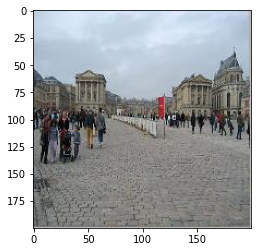

In [12]:
show_example(*dataset[0])

An observation: when the 200x200 jpg images are transformed into Tensors through the __tt.ToTensor()__ function, those Tensors have a Tensor.shape = [3,200,200] i.e. three 200x200 matrixes. Each one of those 3 matrix represents a channel; we can imagine that a channel is a color, red, green or blue, and each cell of the matrix stores the intensity (value between 0. and 1.) of the color that the image has there (in that pixel). 
If we'd want to plot a RGB image stored as a Tensor or matrixes the rows and columns (size) goes before the channels. Thats why we must change the order of the dimensions of the Tensor using the function __permute()__.

In [13]:
img, label = dataset[5000]
print(img.shape, label)
img

torch.Size([3, 200, 200]) 1


tensor([[[0.5686, 0.5686, 0.5725,  ..., 0.5333, 0.3725, 0.1098],
         [0.5647, 0.5686, 0.5686,  ..., 0.4941, 0.4824, 0.1765],
         [0.5647, 0.5686, 0.5686,  ..., 0.4902, 0.5098, 0.4000],
         ...,
         [0.2706, 0.4471, 0.4078,  ..., 0.3333, 0.3373, 0.3490],
         [0.2745, 0.3490, 0.2196,  ..., 0.2980, 0.2392, 0.2196],
         [0.2745, 0.4314, 0.2431,  ..., 0.2627, 0.2784, 0.2275]],

        [[0.7608, 0.7608, 0.7647,  ..., 0.6314, 0.4431, 0.1608],
         [0.7569, 0.7608, 0.7608,  ..., 0.6078, 0.5725, 0.2471],
         [0.7529, 0.7569, 0.7608,  ..., 0.6235, 0.6314, 0.5137],
         ...,
         [0.2039, 0.3804, 0.3412,  ..., 0.3490, 0.3529, 0.3647],
         [0.2078, 0.2824, 0.1529,  ..., 0.3176, 0.2588, 0.2392],
         [0.2078, 0.3647, 0.1765,  ..., 0.2706, 0.2980, 0.2471]],

        [[0.9294, 0.9294, 0.9333,  ..., 0.7882, 0.5922, 0.2941],
         [0.9255, 0.9294, 0.9294,  ..., 0.7725, 0.7333, 0.3961],
         [0.9333, 0.9373, 0.9294,  ..., 0.8039, 0.8118, 0.

Label:  sunny (1)


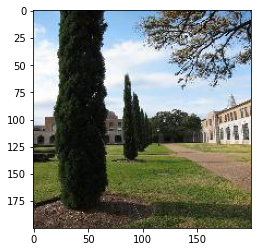

In [14]:
show_example(*dataset[5000])

It is possible to observe that the train images are normalized, in the way that the max value of any channel is 1. and the min is 0., for every image. #Hacer funcion para probar

In [15]:
img, label = test_dataset[0]
print(img.shape, label)
img

torch.Size([3, 200, 200]) 0


tensor([[[0.6863, 0.6863, 0.6902,  ..., 0.6157, 0.6157, 0.6157],
         [0.6863, 0.6863, 0.6863,  ..., 0.6118, 0.6118, 0.6118],
         [0.6824, 0.6863, 0.6863,  ..., 0.6078, 0.6078, 0.6078],
         ...,
         [0.1255, 0.1255, 0.1294,  ..., 0.1294, 0.1216, 0.1137],
         [0.1216, 0.1216, 0.1255,  ..., 0.1333, 0.1216, 0.1137],
         [0.1176, 0.1216, 0.1216,  ..., 0.1373, 0.1255, 0.1176]],

        [[0.6863, 0.6863, 0.6902,  ..., 0.6118, 0.6118, 0.6118],
         [0.6863, 0.6863, 0.6863,  ..., 0.6078, 0.6078, 0.6078],
         [0.6824, 0.6863, 0.6863,  ..., 0.6039, 0.6039, 0.6039],
         ...,
         [0.1451, 0.1451, 0.1490,  ..., 0.1255, 0.1176, 0.1098],
         [0.1412, 0.1412, 0.1451,  ..., 0.1294, 0.1176, 0.1098],
         [0.1412, 0.1451, 0.1451,  ..., 0.1333, 0.1216, 0.1137]],

        [[0.6941, 0.6941, 0.6980,  ..., 0.6314, 0.6314, 0.6314],
         [0.6941, 0.6941, 0.6941,  ..., 0.6275, 0.6275, 0.6275],
         [0.6902, 0.6941, 0.6941,  ..., 0.6235, 0.6235, 0.

Label:  cloudy (0)


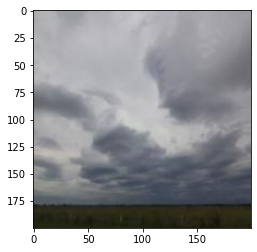

In [16]:
show_example(*test_dataset[0])

In [17]:
img, label = test_dataset[100]
print(img.shape, label)
img

torch.Size([3, 200, 200]) 1


tensor([[[1.0000, 1.0000, 1.0000,  ..., 0.6118, 0.6118, 0.6118],
         [1.0000, 1.0000, 1.0000,  ..., 0.6157, 0.6118, 0.6118],
         [1.0000, 1.0000, 1.0000,  ..., 0.6157, 0.6157, 0.6118],
         ...,
         [0.5216, 0.5412, 0.5412,  ..., 0.4745, 0.4941, 0.4980],
         [0.5451, 0.5412, 0.5255,  ..., 0.4549, 0.4902, 0.5098],
         [0.5608, 0.5412, 0.5176,  ..., 0.4510, 0.5059, 0.5412]],

        [[1.0000, 1.0000, 1.0000,  ..., 0.7255, 0.7255, 0.7255],
         [1.0000, 1.0000, 1.0000,  ..., 0.7294, 0.7255, 0.7255],
         [1.0000, 1.0000, 1.0000,  ..., 0.7294, 0.7294, 0.7255],
         ...,
         [0.4157, 0.4353, 0.4353,  ..., 0.2863, 0.2902, 0.2863],
         [0.4314, 0.4275, 0.4118,  ..., 0.2667, 0.2863, 0.2980],
         [0.4471, 0.4275, 0.4039,  ..., 0.2588, 0.3020, 0.3294]],

        [[1.0000, 1.0000, 1.0000,  ..., 0.8902, 0.8902, 0.8902],
         [1.0000, 1.0000, 1.0000,  ..., 0.8941, 0.8902, 0.8902],
         [1.0000, 1.0000, 1.0000,  ..., 0.8941, 0.8941, 0.

Label:  sunny (1)


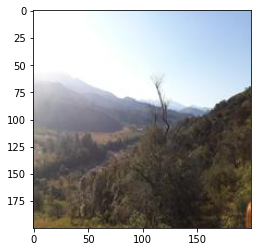

In [18]:
show_example(*test_dataset[100])

Let's plot a batch of the train dataset. 

In [19]:
batch_size = 64

In [20]:
train_loader = DataLoader(dataset, batch_size, shuffle=True, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size, num_workers=4, pin_memory=True)

In [21]:
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0)) 
        #Permutation 
        break

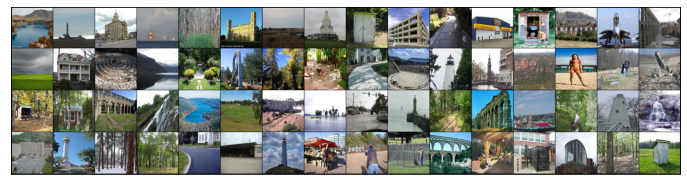

In [22]:
show_batch(train_loader)

Let's plot a batch of the test dataset.

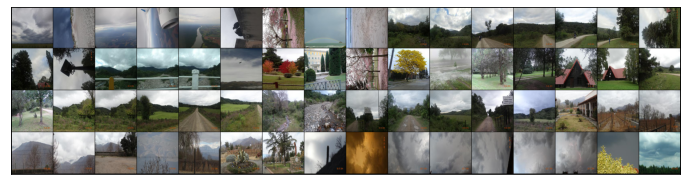

In [23]:
show_batch(test_loader)

In [24]:
#Import Jovian to commit and save my work there
!pip install jovian --upgrade -q
import jovian

<IPython.core.display.Javascript object>

In [25]:
projectName = 'Exploring data_Binary weather classification'
jovian.commit(project=projectName, environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


[jovian] Error: Failed to detect notebook filename. Please provide the correct notebook filename as the "filename" argument to "jovian.commit".
